In [1]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Merge prediction data to test data

In [65]:
# Load the data
test_data = pd.read_feather('../data/processed/test_data.feather')

# Load the predictions
predictions_nn = pd.read_csv('../data/processed/predictions_nn.csv')
predictions_xgb = pd.read_csv('../data/processed/predictions_xgb.csv')
predictions_lgbm = pd.read_csv('../data/processed/predictions_lgbm.csv')


In [66]:
test_data = test_data.reset_index(drop=True)
predictions_nn = predictions_nn.reset_index(drop=True)
predictions_xgb = predictions_xgb.reset_index(drop=True)
predictions_lgbm = predictions_lgbm.reset_index(drop=True)


data = pd.concat([test_data, predictions_nn,predictions_xgb,predictions_lgbm], axis=1)


In [36]:
# Example data
data = pd.DataFrame({
    'y_true': [5, 20, 10, 30, 60, 4000, 1000, 2509, 100, 1000, 5000],
    'y_pred': [10, 20, 15, 25, 30, 5000, 2000, 3000, 200, 1500, 4500]
})

In [72]:
# Get metrics
def metrics_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    return mae, rmse

# Get metrics from data and return table
def metrics_error_table(data):
    mae_nn, rmse_nn = metrics_error(data['totalFare'], data['nn_predicted_totalFare'])
    mae_xgb, rmse_xgb = metrics_error(data['totalFare'], data['xgb_predicted_totalFare'])
    mae_lgbm, rmse_lgbm = metrics_error(data['totalFare'], data['lgbm_predicted_totalFare'])
    return pd.DataFrame({
        'Model': ['NN', 'XGB', 'LGBM'],
        'MAE': [mae_nn, mae_xgb, mae_lgbm],
        'RMSE': [rmse_nn, rmse_xgb, rmse_lgbm]
    })

# mae, rmse = metrics_error(data['y_true'], data['y_pred'])
# print(f'MAE: {mae:.2f}')
# print(f'RMSE: {rmse:.2f}')

In [73]:
metrics_error_table(data)

,Model,MAE,RMSE
0,NN,70.443315,106.791914
1,XGB,66.573627,98.770034
2,LGBM,74.185101,108.315537


### SNS Theme

In [74]:
# Create sns colour palette and add to theme
#a8e6cf pastel green	
#dcedc1	pastel lighter green
#ffd3b6	pastel orange
#ffaaa5	pastel pink
#ff8b94 pastel red 

def set_custom_theme():
    sns.set_style('whitegrid')  # Set the style to whitegrid
    sns.set_palette(sns.color_palette(['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94']))  # Set the custom palette
    # Manually set font sizes
    plt.rc('axes', titlesize=14)     # Font size for axes titles
    plt.rc('axes', labelsize=12)     # Font size for x and y labels
    plt.rc('xtick', labelsize=10)    # Font size for x tick labels
    plt.rc('ytick', labelsize=10)    # Font size for y tick labels
    plt.rc('legend', fontsize=12)    # Font size for legend
    plt.rc('font', size=12)          # General font size
    

# Apply the custom theme
set_custom_theme()


### Scatter Plot True vs Predict

In [ ]:
# Plot true vs predicted scatter using sns
def plot_true_vs_pred(y_true, y_pred, title='Actual vs Predicted',y_pred2=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    if y_pred2 is not None:
        # Add second scatter plot colour coded using last colour in palette
        sns.scatterplot(x=y_true, y=y_pred2, alpha=0.7, color=sns.color_palette()[-1])
        plt.legend([ 'NN','XGB'])
    plt.plot([0, max(y_true)], [0, max(y_true)], color='#d3d3d3', linewidth=1, linestyle='--')  # Light grey dashed line
    plt.title(title, pad=30)  # Add padding to the title
    plt.ylim(0, 5000 )
    plt.xlim(0, 5000 )
    plt.xlabel('Actual', labelpad=15)  # Add padding to the x-axis label
    plt.ylabel('Predicted', labelpad=15)  # Add padding to the y-axis label
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Add white space border

    



/tmp/ipykernel_299351/524554404.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../reports/figures/actual_vs_predicted_nn_xgb_overlay.png')


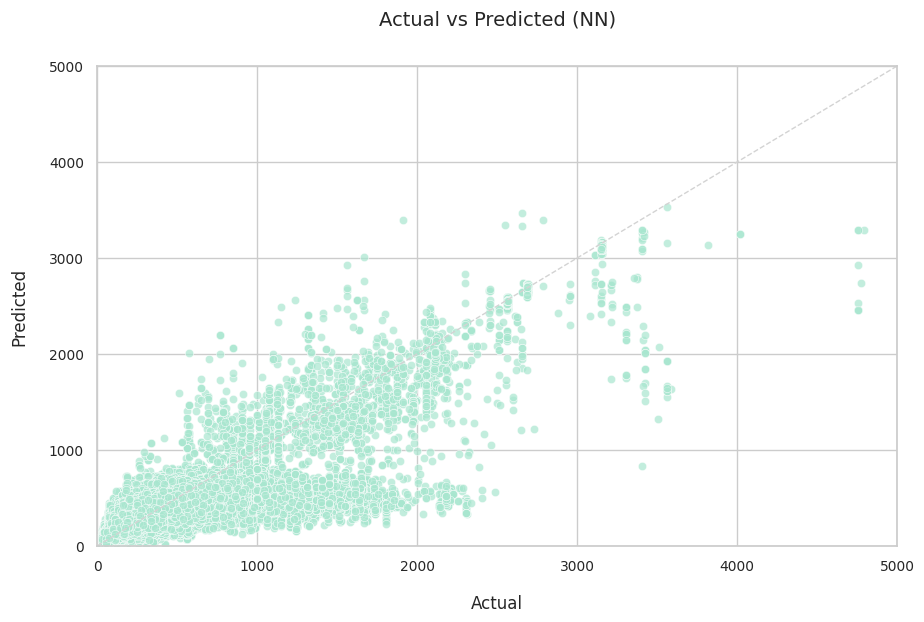

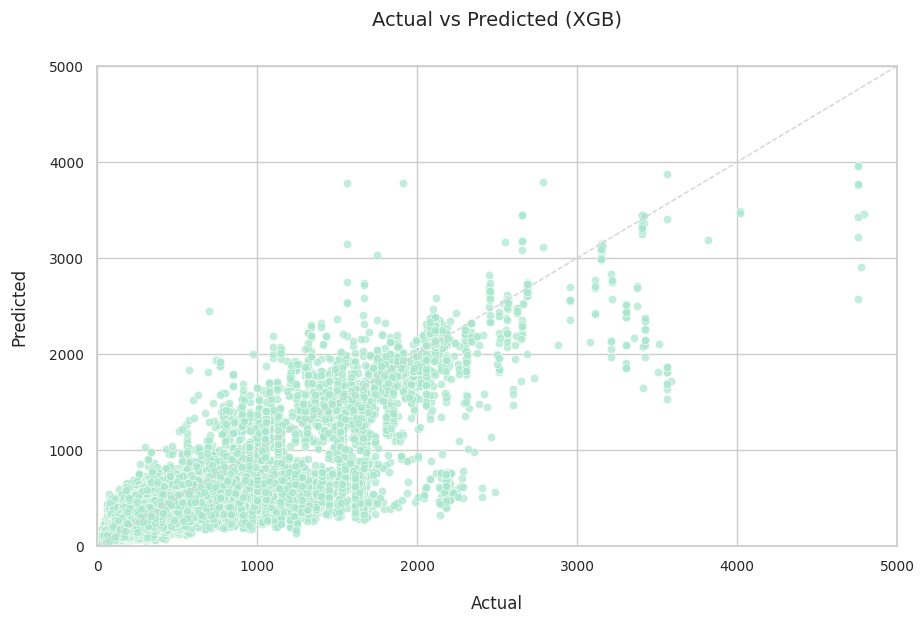

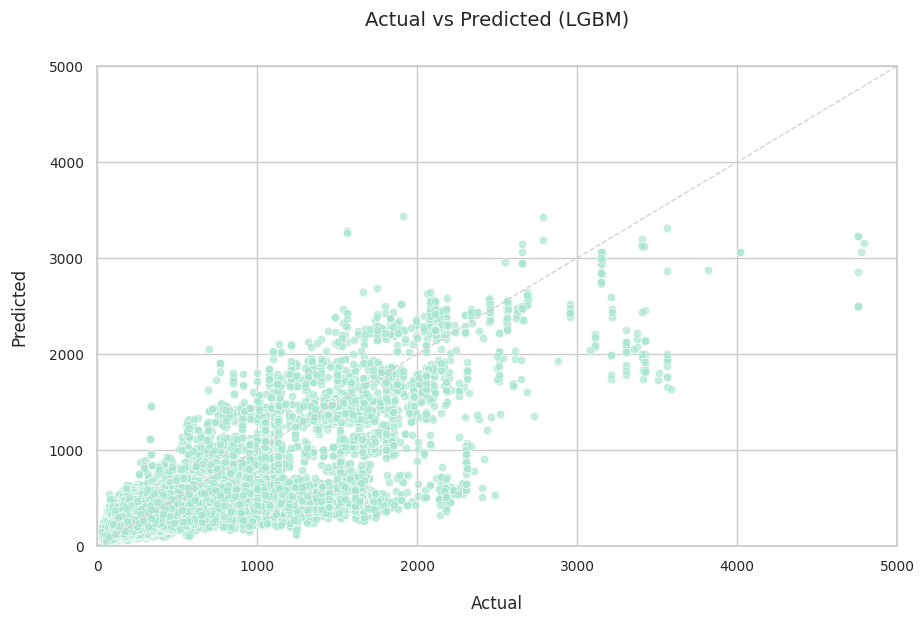

/home/raytechie/Projects/adv_mla_at3/ml_experimentation/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


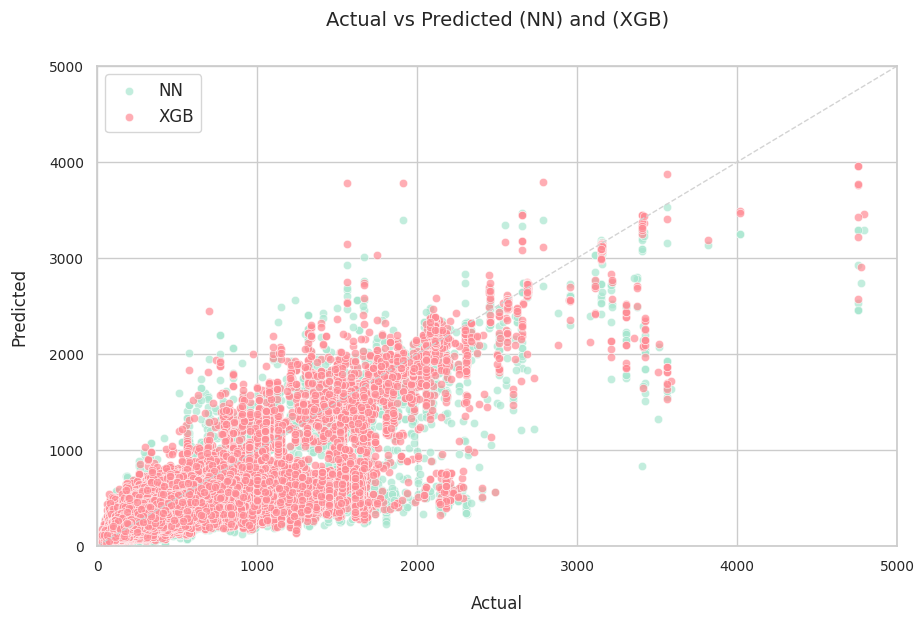

In [92]:
# Example data    

plot_true_vs_pred(data['totalFare'], data['nn_predicted_totalFare'], title='Actual vs Predicted (NN)')
plt.savefig('../reports/figures/actual_vs_predicted_nn.png')
plot_true_vs_pred(data['totalFare'], data['xgb_predicted_totalFare'], title='Actual vs Predicted (XGB)')
plt.savefig('../reports/figures/actual_vs_predicted_xgb.png')
plot_true_vs_pred(data['totalFare'], data['lgbm_predicted_totalFare'], title='Actual vs Predicted (LGBM)')
plt.savefig('../reports/figures/actual_vs_predicted_lgbm.png')
plot_true_vs_pred(data['totalFare'], data['nn_predicted_totalFare'], title='Actual vs Predicted (NN) and (XGB)',y_pred2=data['xgb_predicted_totalFare'])
plt.savefig('../reports/figures/actual_vs_predicted_nn_xgb_overlay.png')

